The purpose of this project is to analyse past jeopardy questions to look for clues which can inform a better preparation strategy.

# Importing data and intial review

In [1]:
import pandas as pd

jeopardy = pd.read_csv("C:\\Users\\User\\Documents\\Python projects\\JEOPARDY_CSV.csv")

print(jeopardy.head())
print('')
print(jeopardy.columns.tolist())

   Show Number    Air Date      Round                         Category  Value  \
0         4680  2004-12-31  Jeopardy!                          HISTORY   $200   
1         4680  2004-12-31  Jeopardy!  ESPN's TOP 10 ALL-TIME ATHLETES   $200   
2         4680  2004-12-31  Jeopardy!      EVERYBODY TALKS ABOUT IT...   $200   
3         4680  2004-12-31  Jeopardy!                 THE COMPANY LINE   $200   
4         4680  2004-12-31  Jeopardy!              EPITAPHS & TRIBUTES   $200   

                                            Question      Answer  
0  For the last 8 years of his life, Galileo was ...  Copernicus  
1  No. 2: 1912 Olympian; football star at Carlisl...  Jim Thorpe  
2  The city of Yuma in this state has a record av...     Arizona  
3  In 1963, live on "The Art Linkletter Show", th...  McDonald's  
4  Signer of the Dec. of Indep., framer of the Co...  John Adams  

['Show Number', ' Air Date', ' Round', ' Category', ' Value', ' Question', ' Answer']


# Renaming the columns

In [2]:
#Remove spaces from column names
cols = jeopardy.columns.tolist()
for i,c in enumerate(cols):
    cols[i] = str.replace(c," ","")
jeopardy.columns = cols

In [3]:
print("New column names:")
print(jeopardy.columns.tolist())

New column names:
['ShowNumber', 'AirDate', 'Round', 'Category', 'Value', 'Question', 'Answer']


# Normalize the question and answer columns

Here we remove punctuation and uppercase characters from the question and answer columns to make word-based comparisons and summaries more straightfoward. Normalized strings are stored in new columns to preserve the original in case it is required.

In [4]:
import string

def norm_string(instr):
    #To lowercase
    instr = instr.lower()
        
    #Using string translate function to remove all punctuation
    translator = str.maketrans('', '', string.punctuation)
    instr = instr.translate(translator)
       
    return instr

jeopardy['clean_question'] = jeopardy['Question'].apply(norm_string)
jeopardy['clean_answer'] = jeopardy['Answer'].apply(norm_string)
jeopardy.head()

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,clean_question,clean_answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was u...,copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisle i...,jim thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show this c...,mcdonalds
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the const...,john adams


In [5]:
# Let's have a quick look for the longest words in the question column before moving on. 
# The longest dictionary word is 45 letters long, so if we're seeing words longer than that we like have dirty data.
def longest_word(instr):
    str_list = instr.split(' ')
    len_list = [len(x) for x in str_list]
    return max(len_list)

jeopardy['longest_quest_word'] = jeopardy['clean_question'].apply(longest_word)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026CD144CE80>]], dtype=object)

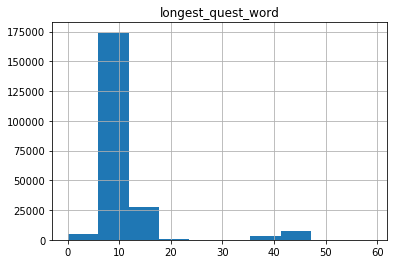

In [6]:
import matplotlib.pyplot
%matplotlib inline

jeopardy.hist('longest_quest_word')

In [7]:
# A bit of a cluster above 30. Likely errors. Let's have a look at a few:
# Setting > 31 as boundary after exploring the values individually and finding a valid word at 31 characters
jeopardy[jeopardy['longest_quest_word'] > 31].head()

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,clean_question,clean_answer,longest_quest_word
29,4680,2004-12-31,Double Jeopardy!,DR. SEUSS AT THE MULTIPLEX,$400,"<a href=""http://www.j-archive.com/media/2004-1...",Horton,a hrefhttpwwwjarchivecommedia20041231dj23mp3be...,horton,48
39,4680,2004-12-31,Double Jeopardy!,"""X""s & ""O""s",$800,"The shorter glass seen <a href=""http://www.j-a...",an old-fashioned,the shorter glass seen a hrefhttpwwwjarchiveco...,an oldfashioned,42
40,4680,2004-12-31,Double Jeopardy!,DR. SEUSS AT THE MULTIPLEX,$1200,"<a href=""http://www.j-archive.com/media/2004-1...",Yertle,a hrefhttpwwwjarchivecommedia20041231dj26mp3ri...,yertle,48
45,4680,2004-12-31,Double Jeopardy!,DR. SEUSS AT THE MULTIPLEX,$1600,"<a href=""http://www.j-archive.com/media/2004-1...",Mulberry Street,a hrefhttpwwwjarchivecommedia20041231dj25mp3so...,mulberry street,51
50,4680,2004-12-31,Double Jeopardy!,DR. SEUSS AT THE MULTIPLEX,$2000,"<a href=""http://www.j-archive.com/media/2004-1...",Bartholomew Cubbins,a hrefhttpwwwjarchivecommedia20041231dj24mp350...,bartholomew cubbins,45


In [8]:
# Definitely dirty looking questions. We could possibly attempt to scrape the listed websites for more info, 
#but for the moment let's drop these rows and continue.
jeopardy = jeopardy[jeopardy['longest_quest_word'] < 35]

# Normalize the value and air date columns

The value column is currently a string. We want it as an integer for the purposes of calculations later. Air date is also a string but a datetime value suits us better.

In [9]:
def norm_val(instr):
    #Using the norm function defined earlier to remove $ and , symbols
    #Not shown here but separate check confirms no decimal representations in string values
    instr = norm_string(instr)
    try: 
        outint = int(instr)
    except:
        outint = 0
    return outint

jeopardy['clean_value'] = jeopardy['Value'].apply(norm_val)

In [10]:
#Straightforward transformation of airdate column
jeopardy['AirDate'] = pd.to_datetime(jeopardy['AirDate'])

# Check for words in answer and question

Here we want to check how often words in the answer can be found in the question, i.e. where the question partly defines the answer. Basic procedure is to split the (normalized) answer and question columns into lists, remove common uninteresting words ('the' and spaces), loop through the answer list and see if the words appeared in the question. Intention is to return a percentage value for each row, showing the proportion of the words in the answer that appear in the question.

In [11]:
# function which will be applied over the rows of the dataset, doing all the processing
def deducible(row):
    #splitting the columns and initialising our counter
    split_answer = row['clean_answer'].split(' ')
    split_question = row['clean_question'].split(' ')
    match_count = 0
    
    #remove uninteresting words
    try:
        split_answer.remove('the')
    except:
        pass
    try:
        split_answer.remove('')
    except:
        pass
    
    #Null handling - we can't divide by zero so we'll return zero
    if len(split_answer) == 0:
        return 0
    
    #Check if answer words in question
    for sa in split_answer:
        if sa in split_question:
            match_count += 1
            
    #Return percentage of matched words
    return match_count / len(split_answer)

#Apply function over rows
jeopardy['answer_in_question'] = jeopardy.apply(deducible,axis=1)

print('Mean percentage of answer words in question: ' + str(round(jeopardy['answer_in_question'].mean(),2)))

Mean percentage of answer words in question: 0.06


Here we have shown that the words in the answer to a jeopardy question are also in the question around 6% of the time. Looking at a few of these cases, it becomes apparent that most are multiple choice type questions. I think this indicates that general knowledge study would be useful. Questions of this format are infrequent so we can't rely on gaining a significant edge from  guessing well on multiple choice questions.

# Checking for repeated questions

We want to find repeated questions to see if study of past questions could be valuable. As a simplistic approach to spotting repeated quesetions, we will analyse longer words in questions and see if they are reappearing. Basic procedure as follows:
- Sort the dataset so that we look at the questions over time
- Initialise a set which will store all the long words used in questions
- Iterrate over the rows of the dataset
- Split the question column and pick out unique words of 6 or more letters (excluding those in a stopword list)
- Check if these words are in our set, and if so increment a counter
- Add the words to the set and return the counter divide by the number of qualifying words in the question

Doing this we end up with a column showing the proportion of long words in the question that appeared in previous questions

In [12]:
# Stop word list, downloaded as csv from http://xpo6.com
import csv

f = open("C:\\Users\\User\\Documents\\Python projects\\stop-word-list.csv","r")
stop_words = list(csv.reader(f))
stop_words = [str.replace(c," ","") for c in stop_words[0]]
stop_words[:10]

['a',
 'able',
 'about',
 'across',
 'after',
 'all',
 'almost',
 'also',
 'am',
 'among']

In [13]:
jeopardy.sort_values('AirDate',ascending=True,inplace=True)

# Using a set for the previously used terms as we're only interested in unique terms
terms_used = set()

# Function performing the operation
def rep_q_check(row):
    split_question = row['clean_question'].split(' ')
    
    #reduce to 6 or more letter words and remove stopwords
    split_question = [s for s in split_question if (len(s) > 5) & (s not in stop_words)]
    
    #remove stopwords
    #split_question = [s for s in split_question if s not in stop_words]
    
    #de-dupe the list - note that the dataquest solution doesn't do this so I have slightly different result
    split_question = list(set(split_question))
    
    #create a counter and loop through word list
    match_count = 0
    for s in split_question:
        if s in terms_used:
            match_count += 1
        #now that we'have checked the word we can add it to the set
        terms_used.add(s)
    
    # Match count will still be zero if there were no 6 letter words, so null handling is simple:
    if len(split_question) > 0:
        match_count /= len(split_question)
    return match_count

jeopardy['question_overlap'] = jeopardy.apply(rep_q_check,axis=1)
jeopardy['question_overlap'].mean()

0.8772061737631703

The mean here is actually surisingly high, at around 88%. There are significant drawbacks in the approach used here, principally that it looks only at single terms not phrases, but the high value does indicate it's worth looking further into repeated questions.

# Looking for common words in high value questions
If we want to maximize our prizes, we're better off focussing our study efforts on high value questions. To do this we will look for words that appear more often than expected in high value questions (defined as questions worth more than $800). We will use a chisquared test to check that the deviation from expectation is statistically significant.

In [14]:
#We'll start by creating a high value column (1 if value over 800, 0 otherwise):
def value_assign(inint):
    if inint > 800:
        return 1
    else:
        return 0
jeopardy['high_value'] = jeopardy['clean_value'].apply(value_assign)

In [15]:
#Just resetting the index to make checking things a little easier
jeopardy.reset_index(inplace=True)
jeopardy.head()

,index,ShowNumber,AirDate,Round,Category,Value,Question,Answer,clean_question,clean_answer,longest_quest_word,clean_value,answer_in_question,question_overlap,high_value
0,84559,1,1984-09-10,Double Jeopardy!,NOTORIOUS,$600,"Lenin called him ruthless, and his purges prov...",Stalin,lenin called him ruthless and his purges prove...,stalin,8,600,0.0,0.0,0
1,84538,1,1984-09-10,Jeopardy!,LAKES & RIVERS,$400,American river only 33 miles shorter than the ...,the Missouri,american river only 33 miles shorter than the ...,the missouri,11,400,0.0,0.0,0
2,84537,1,1984-09-10,Jeopardy!,ACTORS & ROLES,$300,"He may ""Never Say Never Again"" when asked to b...",Sean Connery,he may never say never again when asked to be ...,sean connery,5,300,0.0,0.0,0
3,84536,1,1984-09-10,Jeopardy!,FOREIGN CUISINE,$300,Jewish crepe filled with cheese,a blintz,jewish crepe filled with cheese,a blintz,6,300,0.0,0.0,0
4,84535,1,1984-09-10,Jeopardy!,ANIMALS,$300,"When husbands ""pop"" for an ermine coat, they'r...",weasel,when husbands pop for an ermine coat theyre ac...,weasel,8,300,0.0,0.0,0


## NOTE: The method immediately below was too slow. Do not run on repeats.

In [21]:
#I'm going to time this as it seems slow and I want a comparison to other methods
import time
start = time.time()

#Next create a function that gets the count of high and low value questions containing a given word
def word_counter(instr):
    low_count = 0
    high_count = 0
    for index,row in jeopardy.iterrows():
        split_question = row['clean_question'].split(' ')
        if instr in split_question:
            if row['high_value'] == 1:
                high_count += 1
            else:
                low_count += 1
    return high_count, low_count

#The terms_used set contains all the words used in questions from previous steps
comparison_terms = list(terms_used)
comparison_terms = comparison_terms[0:100]

#Call the word counter and append results to a list
observed_expected = []
for ct in comparison_terms:
    observed_expected.append(word_counter(ct))
    
print(observed_expected[:10])

end = time.time()
print(end - start)

[(0, 1), (1, 3), (0, 1), (1, 0), (0, 1), (0, 1), (0, 1), (1, 7), (0, 1), (0, 1)]
3775.6916251182556


The above method for getting the word count, created from the guided project steps on dataquest, is rather slow as it iterates across the full data set for each row we want to test. It's quicker to iterate across the dataset once only, and loop through the words inside that loop.

In [17]:
import time
start = time.time()

observed_results = {}
comp_terms = list(terms_used)

def word_counter2(row):
        
    split_question = row['clean_question'].split(' ')
    for ct in comp_terms:
        if ct in split_question:
            if ct in observed_results:
                new = observed_results[ct]
                if row['high_value'] == 1:
                    new = (new[0]+1,new[1])
                else:
                    new = (new[0],new[1]+1)
                observed_results[ct] = new
            else:
                if row['high_value'] == 1:
                    observed_results[ct] = (1,0)
                else:
                    observed_results[ct] = (0,1)
    return

for index,row in jeopardy.iterrows():
    word_counter2(row)

total_questions = jeopardy.shape[0]

end = time.time()
print(end - start)


11663.123470067978


For the chisquared test to function reliably, observed frequencies should all be above 5.

In [23]:
# subsetting the observed results into a fresh dictionary
test_dict = {}
for o in observed_results:
    if (observed_results[o][0] > 4) & (observed_results[o][1] > 4): 
        test_dict[o] = observed_results[o]
        
len(test_dict)

7735

In [30]:
#We will use a chisquared test to see if the observed frequencies of high and low value scores matches the expected
#Null hypothesis would be that the observed results are indistinguishable from chance 
#(i.e. that specific words aren't especially likely to be in high or low value questions)

from scipy.stats import chisquare
import numpy as np

#Now getting some expected values
high_value_count = jeopardy[jeopardy['high_value'] == 1].shape[0]
low_value_count = jeopardy.shape[0] - high_value_count

chi_squared = {}
expected = {}
for key in test_dict:
    #total is the number of occurances of the word we're looking at
    total = sum(test_dict[key])
    
    
    #proportion of rows containing the word
    total_prop = total / (high_value_count + low_value_count)
        
    #expected high and low results
    exp_high = total_prop * high_value_count
    exp_low = total_prop * low_value_count
    
    expected[key] = (round(exp_high), round(exp_low))
    
    obs = np.array([test_dict[key][0],test_dict[key][1]])
    exp = np.array([exp_high,exp_low])
    
    chi, p = chisquare(obs,exp)
    
    chi_squared[key] = [chi,p]

for r in chi_squared:
    if chi_squared[r][1] < 0.05:
        if test_dict[r][0] > expected[r][0]:
            print(r,' ',test_dict[r],' ',expected[r],' ',chi_squared[r])

called   (1424, 3528)   (1360, 3592)   [4.1396867403404816, 0.041888920564551506]
american   (830, 1758)   (711, 1877)   [27.554565245944332, 1.5272446432280796e-07]
husbands   (25, 40)   (18, 47)   [3.9450182729586842, 0.047010343191337796]
method   (58, 105)   (45, 118)   [5.3910683641367516, 0.020240075029457266]
british   (621, 1232)   (509, 1344)   [34.01878251867889, 5.4582627726803744e-09]
minister   (179, 395)   (158, 416)   [3.985278609850794, 0.045899509273721627]
french   (866, 1475)   (643, 1698)   [106.65911422166218, 5.2872299449441507e-25]
defense   (69, 118)   (51, 136)   [8.3520703129347282, 0.0038524812074032474]
battle   (302, 524)   (227, 599)   [34.305714985493438, 4.7099664405864329e-09]
freedom   (65, 124)   (52, 137)   [4.5508423799074702, 0.032902555141094011]
france   (248, 476)   (199, 525)   [16.748085060712608, 4.268532352660209e-05]
appropriately   (80, 154)   (64, 170)   [5.308140352326622, 0.021226001810632191]
english   (401, 828)   (338, 891)   [16.442

contraction   (16, 20)   (10, 26)   [5.2094096772789378, 0.022464961120138092]
casablanca   (17, 22)   (11, 28)   [5.0896486294744312, 0.024069067877393321]
bordered   (17, 24)   (11, 30)   [4.0325020586588796, 0.044631702089482791]
chiles   (12, 14)   (7, 19)   [4.5580593147829607, 0.032764179775908189]
tribute   (48, 83)   (36, 95)   [5.5362292081900843, 0.018626676338981504]
effect   (52, 91)   (39, 104)   [5.6832443206295533, 0.017127668524065012]
explorer   (89, 153)   (66, 176)   [10.531832905947828, 0.0011733578438978161]
culture   (41, 68)   (30, 79)   [5.6357423012315691, 0.017597892507994158]
pianist   (34, 41)   (21, 54)   [12.019041119864013, 0.00052659786963861954]
responsibility   (8, 8)   (4, 12)   [4.0783185122204904, 0.043436864454507097]
regions   (31, 43)   (20, 54)   [7.7305666409082505, 0.0054293707727184806]
astronomer   (50, 79)   (35, 94)   [8.2596787428501379, 0.0040535300544150363]
shelley   (28, 44)   (20, 52)   [4.7161296832591653, 0.02988092622898986]
blith

geologic   (15, 9)   (7, 17)   [14.786627196352999, 0.00012038619606615053]
sinclair   (26, 30)   (15, 41)   [10.108118149774587, 0.0014761761939723701]
sondheim   (15, 10)   (7, 18)   [13.282940138609618, 0.00026783213813584789]
harlem   (24, 33)   (16, 41)   [6.1320708085000506, 0.013275129402717413]
regulate   (7, 6)   (4, 9)   [4.5412986798920114, 0.033086480978222754]
saxophonist   (12, 15)   (7, 20)   [3.9070572579592042, 0.048083723158621375]
julian   (16, 18)   (9, 25)   [6.5517925109108059, 0.010477854715444499]
aeschylus   (11, 9)   (5, 15)   [7.6111461441788979, 0.005800860095617236]
millard   (9, 8)   (5, 12)   [5.5381652779559349, 0.018606079574992936]
equestrian   (11, 9)   (5, 15)   [7.6111461441788979, 0.005800860095617236]
positive   (25, 29)   (15, 39)   [9.6116076469323541, 0.0019335130193744567]
journal   (39, 64)   (28, 75)   [5.5904662031395764, 0.018058489251529482]
katharine   (16, 20)   (10, 26)   [5.2094096772789378, 0.022464961120138092]
statements   (7, 5)  

updike   (11, 8)   (5, 14)   [8.8308306703349437, 0.0029618353736987871]
elderly   (13, 16)   (8, 21)   [4.3879989132048394, 0.036192768688827204]
defendant   (7, 6)   (4, 9)   [4.5412986798920114, 0.033086480978222754]
legislative   (16, 15)   (9, 22)   [9.0733571095488745, 0.0025936048286432762]
wessex   (8, 5)   (4, 9)   [7.5758107220933315, 0.0059156766491420352]
himalayan   (14, 18)   (9, 23)   [4.2595464329468076, 0.039030341250923174]
limerick   (8, 8)   (4, 12)   [4.0783185122204904, 0.043436864454507097]
proteins   (12, 11)   (6, 17)   [7.0482780206982518, 0.007934148890195919]
africanamerican   (55, 67)   (34, 88)   [19.004751951907419, 1.3039331789992999e-05]
happening   (12, 11)   (6, 17)   [7.0482780206982518, 0.007934148890195919]
expatriate   (9, 5)   (4, 10)   [9.5272323512097401, 0.0020244518588428801]
thrillers   (10, 8)   (5, 13)   [7.1292428836405302, 0.0075836743141977038]
clowns   (12, 12)   (7, 17)   [6.1174777683307333, 0.013385165281518105]
leoncavallo   (8, 5)

opined   (9, 7)   (4, 12)   [6.6543112614744677, 0.0098916197273238964]
alphanumeric   (11, 12)   (6, 17)   [4.7860089981977207, 0.028691833435822135]
courtyard   (7, 6)   (4, 9)   [4.5412986798920114, 0.033086480978222754]
alliteratively   (10, 6)   (4, 12)   [9.857751464235335, 0.0016911767642633036]
epigraph   (6, 5)   (3, 8)   [4.0490598435849225, 0.04419595218954539]
severely   (6, 5)   (3, 8)   [4.0490598435849225, 0.04419595218954539]


Here we have found a list of words which appear frequently in high value questions, at a rate statistically distinct from random chance. This could provide an excellent starting point for building a study strategy.

Overall, this approach is still quite basic. A more interesting approach would be to analyse phrases, rather than words, as context matters significantly for meaning. This will be a topic for later investigation.